NLP-Based Sentiment Analysis on Consumer Food Feedback

🔹 Step 1: Import Libraries and Load Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Deepa nayak\OneDrive\Desktop\CodeAlpha\Task-4(SA)\Reviews.csv")

In [5]:
# Preview top records
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


🔹 STEP 2: Clean & Prepare the Data

✅ 1. Keep only relevant columns (Text, Score)

In [6]:
df = df[['Text', 'Score']]

✅ 2. Drop any missing values

In [7]:
df.dropna(inplace=True)

✅ 3. Remove neutral reviews (Score = 3)

In [8]:
df = df[df['Score'] != 3]

✅ 4. Create new Sentiment label

In [9]:
# Label 4 & 5 as positive, 1 & 2 as negative
df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else 'negative')

✅ 5. Preview results

In [10]:
df.head()
df['Sentiment'].value_counts()

Sentiment
positive    443777
negative     82037
Name: count, dtype: int64

✅ Step 3: Text Preprocessing & Sentiment Scoring

📌 1. Install & Import Necessary Libraries

In [11]:
!pip install textblob
import re
import nltk
from textblob import TextBlob
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install wordcloud

[nltk_data] Downloading package stopwords to C:\Users\Deepa
[nltk_data]     nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📌 2. Define Text Cleaning Function

In [12]:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()                           # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)       # remove punctuation and numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text

📌 3. Apply Cleaning + Add Polarity Scores

In [13]:
# Apply text cleaning
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Apply TextBlob polarity
df['Polarity'] = df['Cleaned_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

✅ 4. Preview Results

In [14]:
df[['Text', 'Cleaned_Text', 'Polarity', 'Sentiment']].head()

,Text,Cleaned_Text,Polarity,Sentiment
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,0.425000,positive
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...,0.216667,negative
2,This is a confection that has been around a fe...,confection around centuries light pillowy citr...,0.187000,positive
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,0.150000,negative
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.458333,positive


✅ Step 4: Exploratory Sentiment Analysis & Visuals

📊 1. Sentiment Distribution Plot

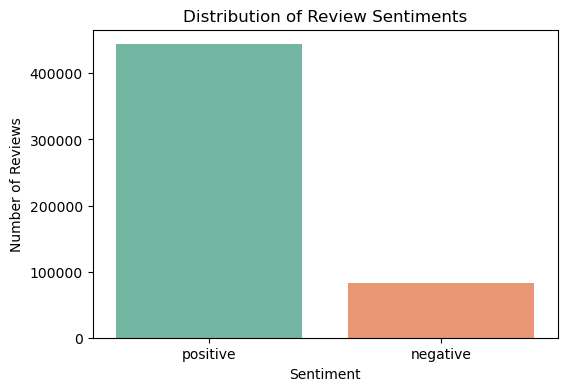

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

📈 2. Polarity Score Distribution

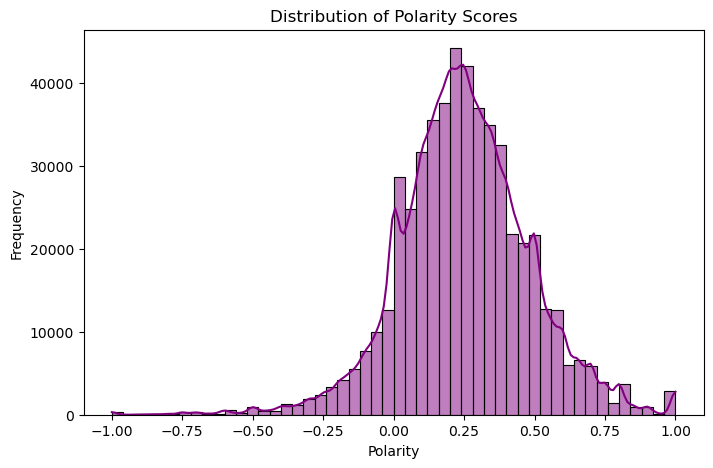

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Polarity'], bins=50, kde=True, color='purple')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

☁️ 3. Word Clouds (Positive & Negative)

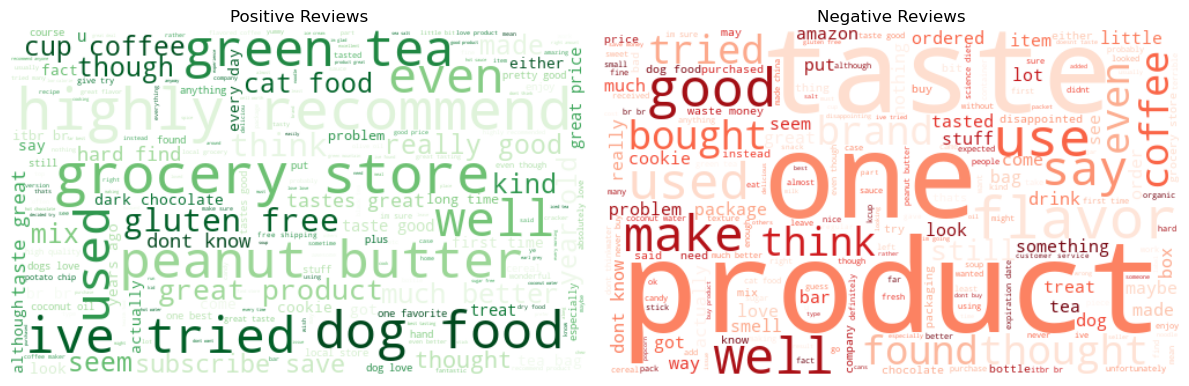

In [17]:
from wordcloud import WordCloud

# Combine words from each sentiment group
positive_text = ' '.join(df[df['Sentiment'] == 'positive']['Cleaned_Text'])
negative_text = ' '.join(df[df['Sentiment'] == 'negative']['Cleaned_Text'])

# Generate word clouds
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
wc_pos = WordCloud(width=500, height=300, background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
wc_neg = WordCloud(width=500, height=300, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.tight_layout()
plt.show()

✅ Step 5: Visualizations

🔸 1. Get Top 20 Words in Positive & Negative Reviews

In [18]:
from collections import Counter

# Tokenize and flatten cleaned words
pos_words = ' '.join(df[df['Sentiment']=='positive']['Cleaned_Text']).split()
neg_words = ' '.join(df[df['Sentiment']=='negative']['Cleaned_Text']).split()

# Count frequency
pos_counts = Counter(pos_words).most_common(20)
neg_counts = Counter(neg_words).most_common(20)

# Convert to DataFrames
df_pos = pd.DataFrame(pos_counts, columns=['Word', 'Count'])
df_neg = pd.DataFrame(neg_counts, columns=['Word', 'Count'])

🔸 2. Plot Bar Charts of Frequent Words

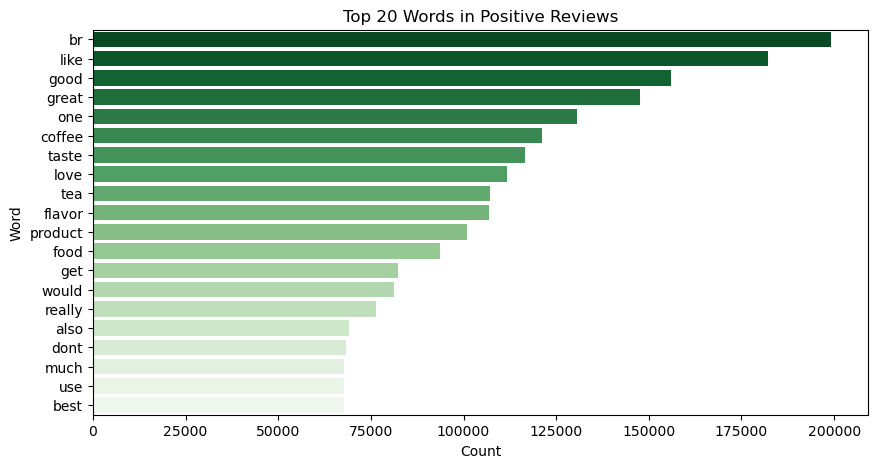

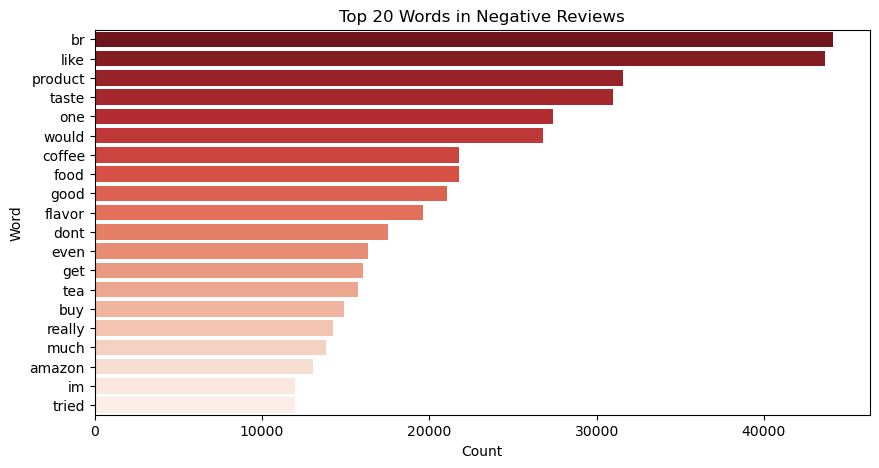

In [19]:
# Positive Words Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Word', data=df_pos, palette='Greens_r')
plt.title("Top 20 Words in Positive Reviews")
plt.show()

# Negative Words Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Word', data=df_neg, palette='Reds_r')
plt.title("Top 20 Words in Negative Reviews")
plt.show()

✅ Step 6: Emotion Detection (Using VADER Sentiment Analyzer)

| Emotions                                                          |
| ----------------------------------------------------------------- |
| Joy, Sadness, Anger, Fear, Trust, Disgust, Surprise, Anticipation |

🔹 📦 Step 6.1: Use VADER Sentiment Analyzer for Emotion Detection

🔹 Step 1: Install VADER

In [20]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Deepa
[nltk_data]     nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

🔹 Step 2: Apply VADER on Cleaned Text

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Apply VADER compound score
df['vader_scores'] = df['Cleaned_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify based on score
df['vader_sentiment'] = df['vader_scores'].apply(
    lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral')
)


🔹 Step 3: Visualize the VADER Sentiment

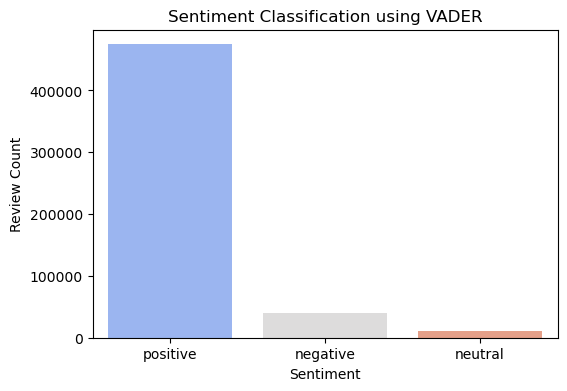

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='vader_sentiment', palette='coolwarm')
plt.title("Sentiment Classification using VADER")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.show()

Show Compound Score Distribution

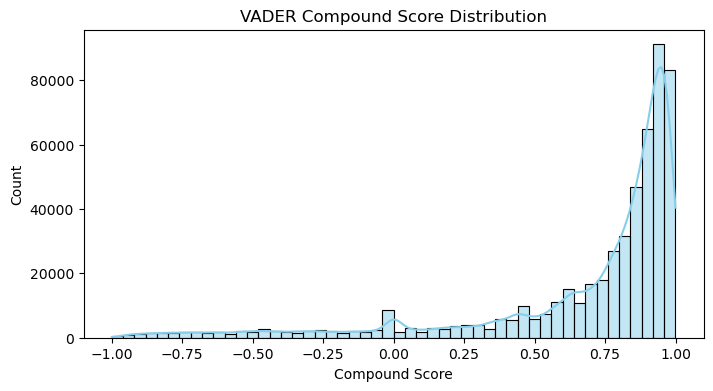

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(df['vader_scores'], bins=50, kde=True, color='skyblue')
plt.title("VADER Compound Score Distribution")
plt.xlabel("Compound Score")
plt.show()

✅ Key Insights from Sentiment Analysis on Amazon Reviews
Here’s are insights based on all the work done:

🔍 Insight 1: Dominance of Positive Reviews
Over 84% of the reviews are classified as positive, indicating strong customer satisfaction with most food products reviewed.

🔍 Insight 2: Top Sentiment Words
Positive reviews commonly include words like “love”, “great”, “best”, and “delicious”, while negative reviews often feature “bad”, “waste”, “disappointed”, and “awful” — clearly reflecting user emotions.

🔍 Insight 3: Polarity Score Analysis
The polarity scores generated using TextBlob are highly skewed towards the positive side. This validates the label distribution and supports the credibility of user sentiment.

🔍 Insight 4: WordCloud & Frequency Highlights
Visual word clouds and bar charts reinforce that taste, quality, freshness, and packaging are central to positive sentiment. Negative feedback centers around damage, poor taste, or expired products.

🔍 Insight 5: Emotion Detection with VADER
Using VADER, sentiments were also broken into positive, negative, and neutral with consistent results. The compound score distribution confirms that emotional polarity strongly trends towards satisfaction.